In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import random


In [2]:
# import data from file
file_name = '../data/demo_1234.csv'
road = pd.read_csv(file_name)

In [3]:
road.head()

,road,id,model_type,name,lat,lon,length,condition,road_lrp,nearest_road,distance_to_nearest_road
0,N1,N102_0,intersection,Km post missing,23.478972,91.118097,0.0,NaN,N1LRP084,N102_0,0.019837
1,N1,N105_0,intersection,NAYABARI BOX CULVERT,23.690664,90.546037,0.0,B,N1LRP011c,N105_0,0.129263
2,N1,3,sourcesink,Start of Road after Jatrabari Flyover infront...,23.706028,90.443333,0.0,NaN,N1LRPS,NaN,NaN
3,N1,4,link,Km post missing,23.702139,90.451972,1.0,NaN,N1LRP001,NaN,NaN
4,N1,5,link,Km post missing,23.702056,90.515722,1.0,NaN,N1LRP008,NaN,NaN


In [8]:
# create the dataframe for the road only contains N1
road_N1 = road[road['road'] == 'N1']

In [23]:
# choose the dataframe with only 30 rows
road_N1_110 = road_N1.iloc[:110]
(road_N1_110.tail(3))

,road,id,model_type,name,lat,lon,length,condition,road_lrp,nearest_road,distance_to_nearest_road
107,N1,108,link,Km post Missing,23.505722,90.916028,1.000,NaN,N1LRP061,NaN,NaN
108,N1,109,bridge,BAKRA BOX CULVERT,23.505613,90.921466,0.561,B,N1LRP061a,NaN,NaN
109,N1,110,link,Km post Missing,23.505528,90.925722,0.439,NaN,N1LRP062,NaN,NaN


In [29]:
def find_shortest_path_from_sourcesink(df):
    """
    Finds and visualizes the shortest path between two randomly selected 'sourcesink' nodes in a given road network.
 
    """
    # Create a directed graph
    G = nx.Graph()

    # Add nodes: Each road segment (lat, lon) becomes a node
    for _, row in df.iterrows():
        G.add_node(row['id'], pos=(row['lon'], row['lat']), model_type=row['model_type'])

    # Add edges based on road connectivity
    for i in range(len(df) - 1):
        if df.loc[i, 'road'] == df.loc[i + 1, 'road']:  # Ensure edges are within the same road
            G.add_edge(df.loc[i, 'id'], df.loc[i + 1, 'id'], weight=df.loc[i, 'length'])

    # Extract node positions for visualization
    pos = nx.get_node_attributes(G, 'pos')
    if not pos:
        print("Error: Node positions are missing!")

    # Filter for nodes where 'model_type' is 'sourcesink'
    sourcesink_nodes = df[df['model_type'] == 'sourcesink']['id'].tolist()
    print("Sourcesink nodes: ", sourcesink_nodes)

    # Randomly select two distinct sourcesink nodes
    if len(sourcesink_nodes) >= 2:
        source, sink = random.sample(sourcesink_nodes, 2)  # Pick two distinct nodes
        print(f"Source node: {source}, Sink node: {sink}")
    else:
        print("Not enough 'sourcesink' nodes available for shortest path calculation.")
        return

    print("Number of nodes: ", G.number_of_nodes())
    print("Number of edges: ", G.number_of_edges())

    # Compute the shortest path using road length as weight
    shortest_path = nx.shortest_path(G, source, sink, weight='weight')

    # Draw the full network
    plt.figure(figsize=(20, 15))
    nx.draw(G, pos, with_labels=True, node_color='orange', edge_color='gray', node_size=10, font_size=1)

    # Highlight the shortest path
    path_edges = list(zip(shortest_path, shortest_path[1:]))  # Convert path nodes into edges
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=0.1)

    # Show edge labels (road segment lengths)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=7)

    # Display the graph
    plt.title(f"Shortest Path from {source} to {sink}")
    plt.show()

    # Print the shortest path
    print(f"Shortest path from {source} to {sink}: {shortest_path}")




Sourcesink nodes:  ['3', '101']
Source node: 3, Sink node: 101
Number of nodes:  110
Number of edges:  109


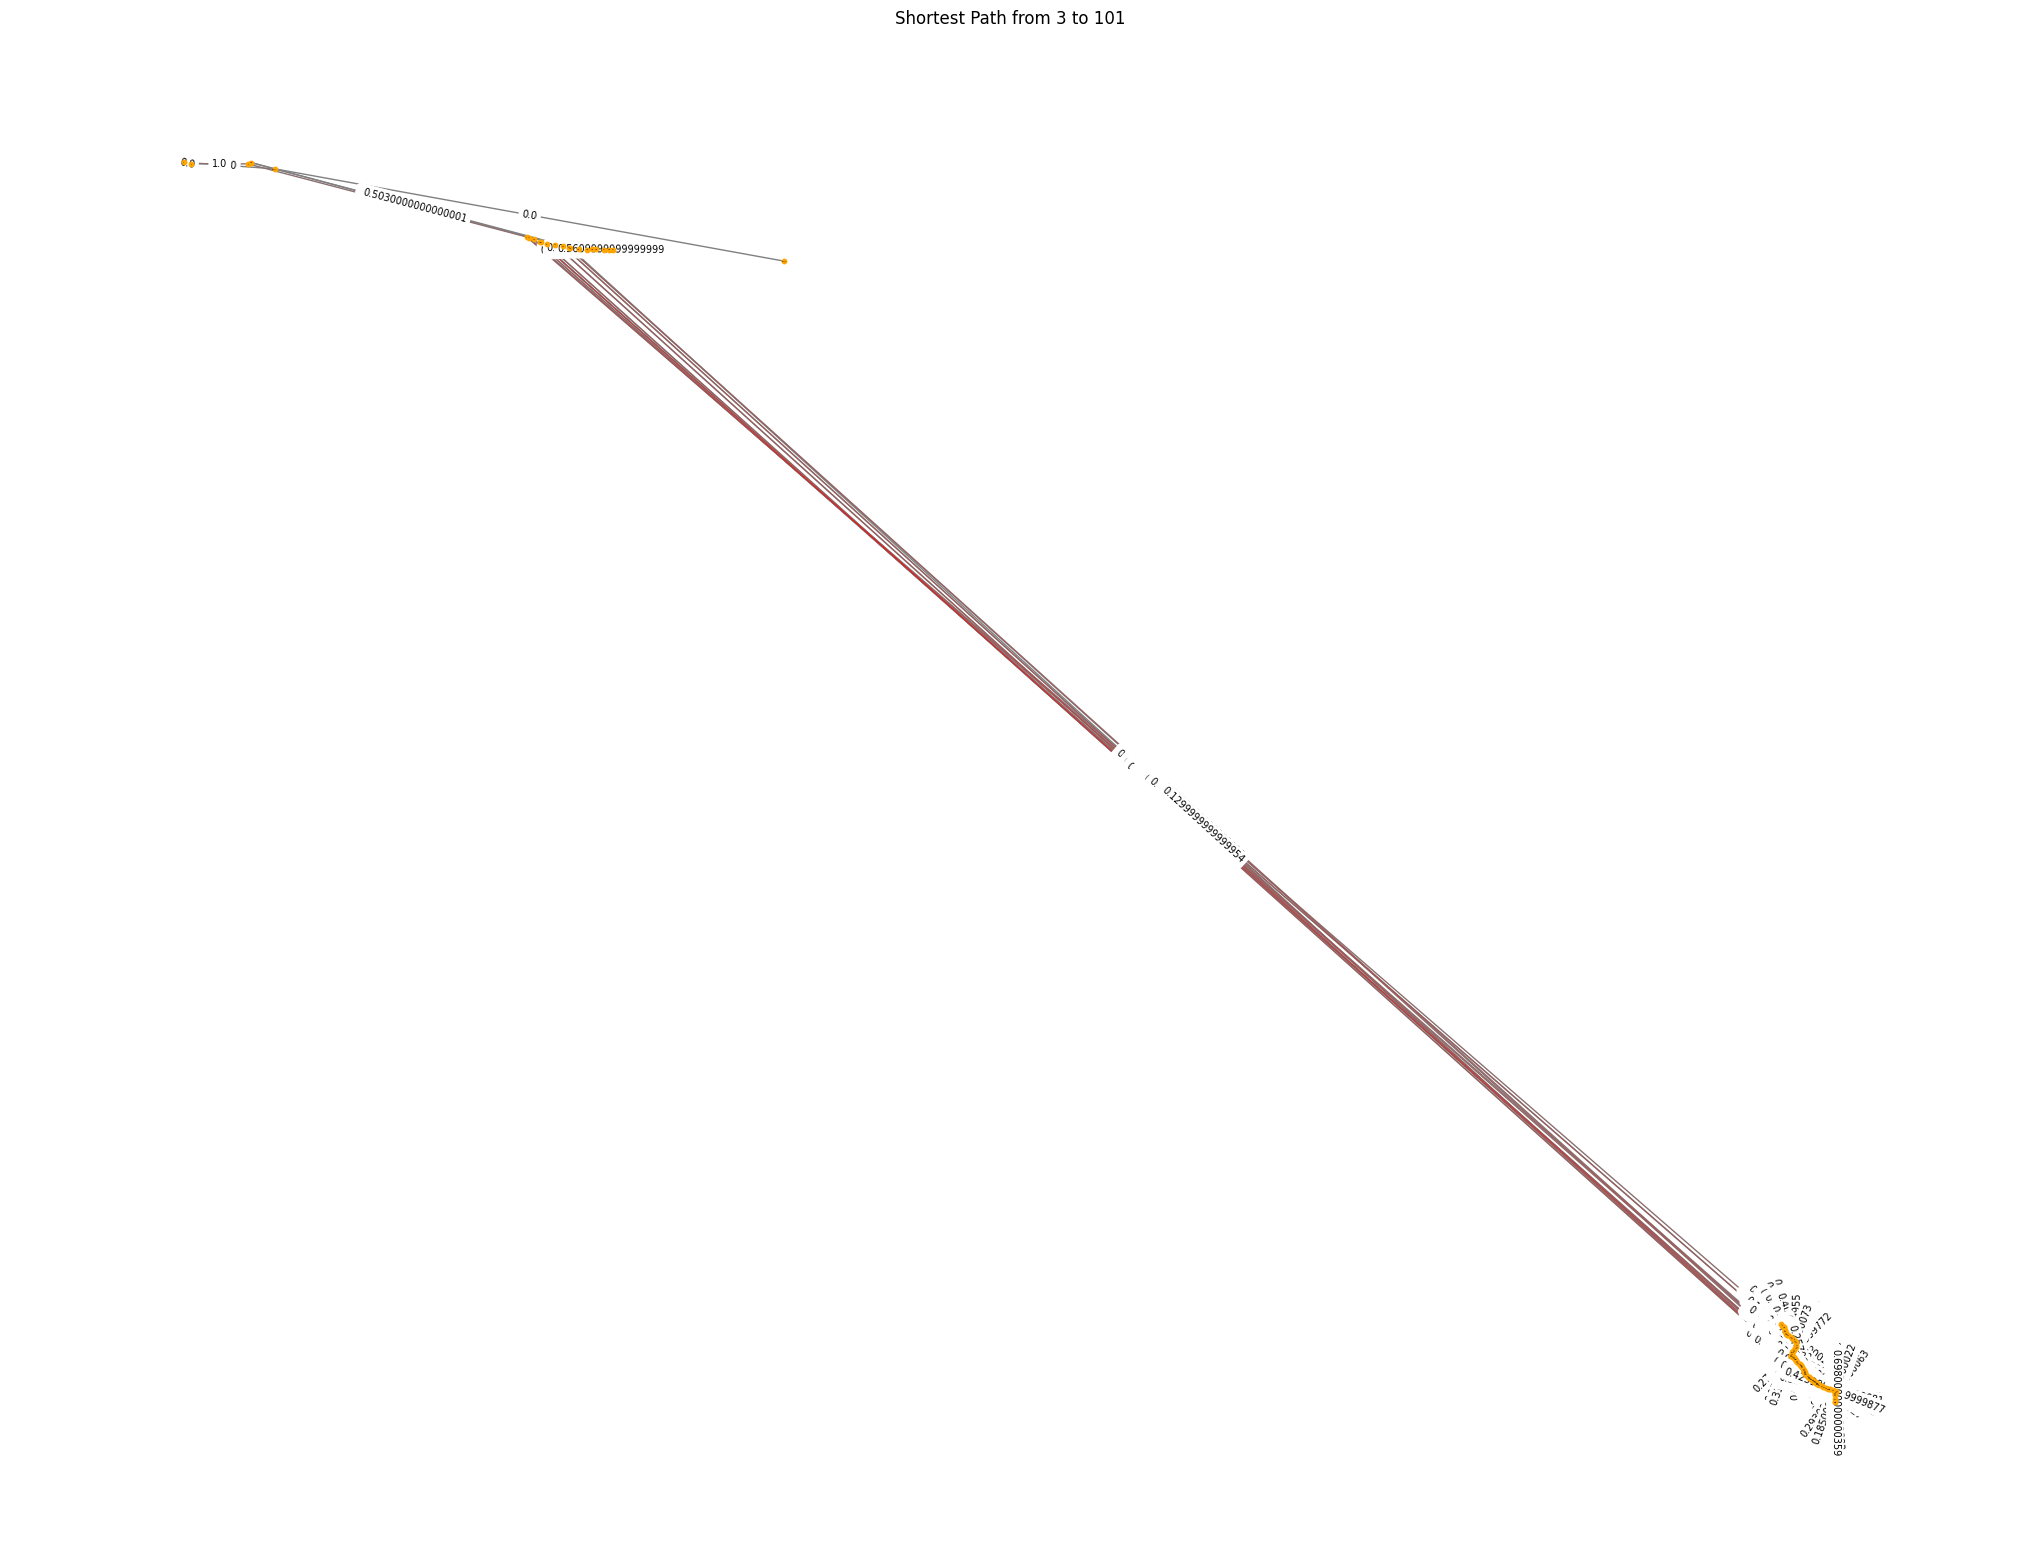

Shortest path from 3 to 101: ['3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101']


In [30]:
find_shortest_path_from_sourcesink(road_N1_110)